In [2]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

In [1]:
import os
import numpy as np
import cv2  # OpenCV para leer y preprocesar imágenes
from tensorflow.keras.utils import to_categorical

def load_images_from_folder(folder):
    images = []
    labels = []
    label_names = sorted(os.listdir(folder))  # Asumiendo que cada subcarpeta es una clase
    label_dict = {name: idx for idx, name in enumerate(label_names)}

    for label_name in label_names:
        class_folder = os.path.join(folder, label_name)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            img = cv2.imread(img_path)
            images.append(img)
            labels.append(label_dict[label_name])

    return np.array(images), np.array(labels)

folder = 'low_data/train'
img_size = (224, 224)
images, labels = load_images_from_folder(folder, img_size)

images = images / 255.0

num_classes = len(np.unique(labels))
labels = to_categorical(labels, num_classes=num_classes)


TypeError: load_images_from_folder() takes 1 positional argument but 2 were given

(712, 30, 224, 224)
(712,)


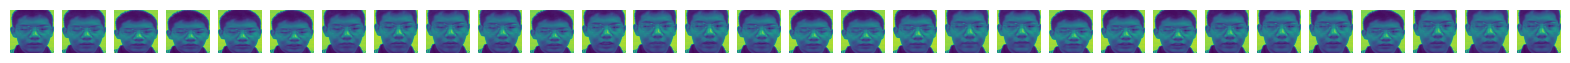

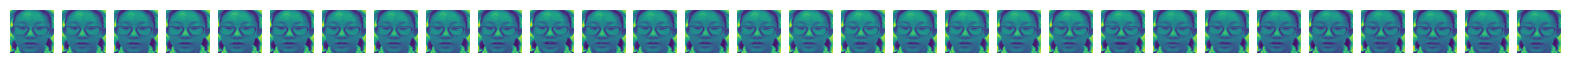

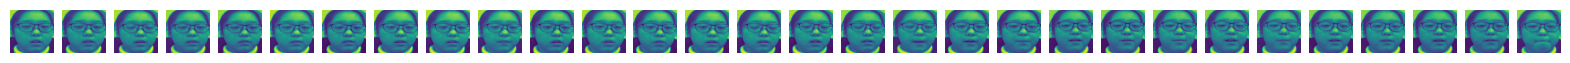

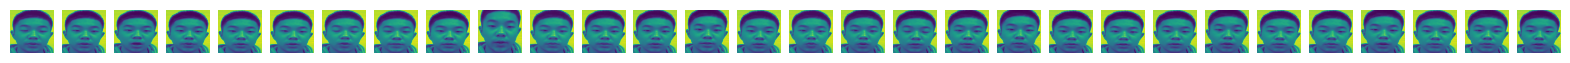

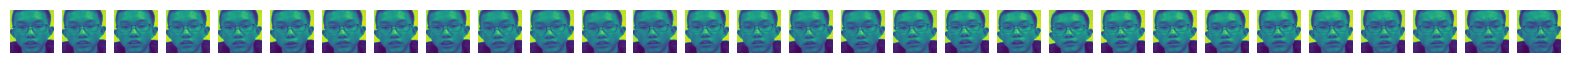

In [3]:
X_train, y_train = load_and_normalize_images('low_data/train'  , class_labels)
print(X_train.shape)
print(y_train.shape)
X_train, y_train = shuffle(X_train, y_train, random_state=42)

display_sequences(X_train, num_sequences_to_show=5)


(133, 30, 224, 224)
(133,)


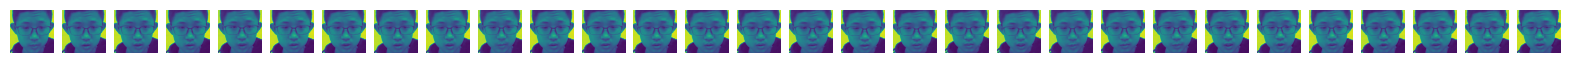

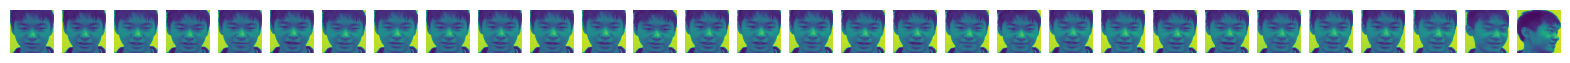

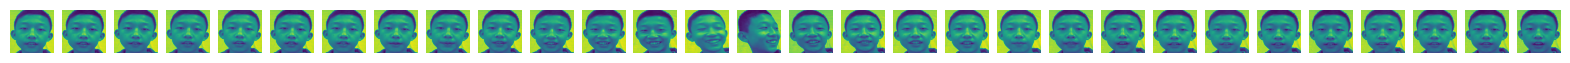

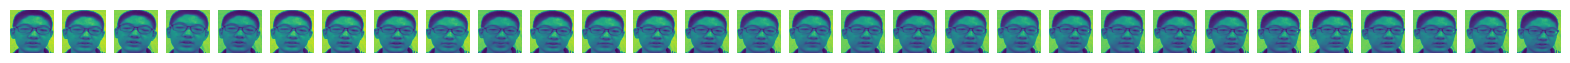

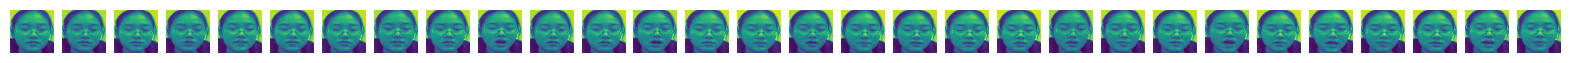

In [4]:
X_test, y_test = load_and_normalize_images('low_data/test' , class_labels)
X_test, y_test = shuffle(X_test, y_test, random_state=42)
print(X_test.shape)
print(y_test.shape)

display_sequences(X_test, num_sequences_to_show=5)

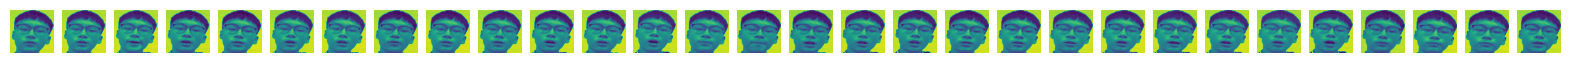

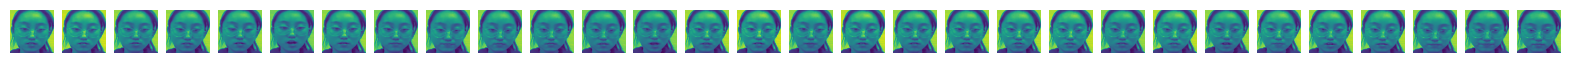

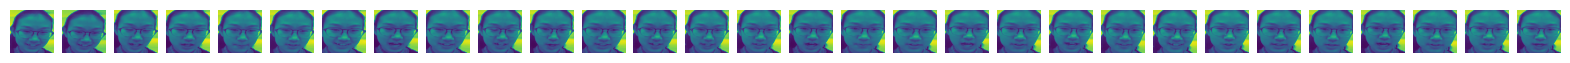

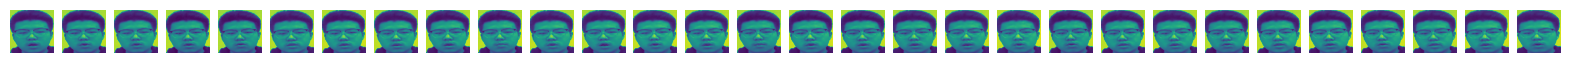

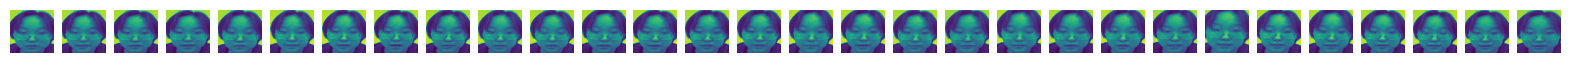

(131, 30, 224, 224)
(131,)


In [5]:
X_val, y_val = load_and_normalize_images('low_data/dev', class_labels)
X_val, y_val = shuffle(X_val, y_val, random_state=42)

display_sequences(X_val, num_sequences_to_show=5)
print(X_val.shape)
print(y_val.shape)

In [6]:
X_val

array([[[[0.76470588, 0.76470588, 0.76470588, ..., 0.77647059,
          0.77254902, 0.77254902],
         [0.76470588, 0.76470588, 0.76470588, ..., 0.76862745,
          0.76862745, 0.76862745],
         [0.76470588, 0.76470588, 0.76470588, ..., 0.76078431,
          0.76078431, 0.76078431],
         ...,
         [0.80784314, 0.80392157, 0.80392157, ..., 0.80784314,
          0.80784314, 0.80784314],
         [0.8       , 0.8       , 0.79607843, ..., 0.80784314,
          0.80784314, 0.80784314],
         [0.79215686, 0.79215686, 0.79607843, ..., 0.80784314,
          0.80784314, 0.80784314]],

        [[0.76078431, 0.76078431, 0.76078431, ..., 0.77647059,
          0.77254902, 0.77254902],
         [0.76078431, 0.76078431, 0.76470588, ..., 0.76470588,
          0.76470588, 0.76470588],
         [0.75686275, 0.76078431, 0.76470588, ..., 0.76078431,
          0.76078431, 0.76078431],
         ...,
         [0.78823529, 0.78039216, 0.77254902, ..., 0.8       ,
          0.80392157, 0.8

In [7]:
height = 64
width = 64
channels = 3
sequence_length = 30

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, TimeDistributed,Dropout,BatchNormalization,LSTM,Dense

model = Sequential()
model.add(TimeDistributed(Conv2D(16, (3, 3), activation='relu'), input_shape=(30,224, 224, 1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))

model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.5))) 


model.add(TimeDistributed(Conv2D(32, (3, 3), activation='relu')))
model.add(TimeDistributed(BatchNormalization()))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Dropout(0.5))) 
model.add(TimeDistributed(Flatten()))

model.add(LSTM(50,return_sequences=False))
model.add(Dense(32,activation="relu"))
model.add(Dense(2,activation="softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDistr  (None, 30, 222, 222, 16)  160      
 ibuted)                                                         
                                                                 
 time_distributed_1 (TimeDis  (None, 30, 111, 111, 16)  0        
 tributed)                                                       
                                                                 
 time_distributed_2 (TimeDis  (None, 30, 109, 109, 32)  4640     
 tributed)                                                       
                                                                 
 time_distributed_3 (TimeDis  (None, 30, 54, 54, 32)   0         
 tributed)                                                       
                                                                 
 time_distributed_4 (TimeDis  (None, 30, 52, 52, 32)   9

In [10]:
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

In [ ]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)

In [ ]:
# from keras.models import Model
# from keras.layers import Input, LSTM, Dense
# from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# sequence_input = Input(shape=(30, 64, 64, 1))  # Secuencia de imágenes
# cnn_out = TimeDistributed(cnn)(sequence_input)

# lstm_out = LSTM(100)(cnn_out)
# dense_out = Dense(64,activation='relu')(lstm_out)
# predictions = Dense(1, activation='sigmoid')(dense_out)

# model = Model(inputs=sequence_input, outputs=predictions)
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [12]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val),callbacks=[early_stopping, reduce_lr])

Epoch 1/10
23/23 [==============================] - 249s 10s/step - loss: 0.6869 - accuracy: 0.5604 - val_loss: 0.5794 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 2/10
23/23 [==============================] - 233s 10s/step - loss: 0.6404 - accuracy: 0.6236 - val_loss: 0.4149 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 3/10
23/23 [==============================] - 233s 10s/step - loss: 0.5848 - accuracy: 0.6896 - val_loss: 0.3989 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 4/10
23/23 [==============================] - 233s 10s/step - loss: 0.5258 - accuracy: 0.7528 - val_loss: 0.3641 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 5/10
23/23 [==============================] - 226s 10s/step - loss: 0.4294 - accuracy: 0.8287 - val_loss: 0.3743 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 6/10
23/23 [==============================] - 225s 10s/step - loss: 0.3686 - accuracy: 0.8610 - val_loss: 0.3624 - val_accuracy: 0.9008 - lr: 0.0010
Epoch 7/10
23/23 [==============================] - 235s 10s/step - lo

In [14]:
model.save('experimento-224-1.h5')

In [15]:
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')

5/5 [==============================] - 8s 2s/step - loss: 0.3339 - accuracy: 0.9008
Validation Loss: 0.3339129388332367, Validation Accuracy: 0.9007633328437805


In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

5/5 [==============================] - 9s 2s/step - loss: 0.3473 - accuracy: 0.8947
Accuracy: 89.47%


In [17]:
predictions = model.predict(X_test)
predictions

5/5 [==============================] - 9s 2s/step


array([[0.9234204 , 0.0765795 ],
       [0.9406137 , 0.05938639],
       [0.90590423, 0.09409579],
       [0.9400012 , 0.05999878],
       [0.9001456 , 0.09985439],
       [0.94248706, 0.05751293],
       [0.92584586, 0.0741541 ],
       [0.928402  , 0.07159793],
       [0.9384755 , 0.06152456],
       [0.9045995 , 0.09540052],
       [0.9145981 , 0.08540188],
       [0.92425954, 0.07574047],
       [0.90131545, 0.0986845 ],
       [0.89786375, 0.10213623],
       [0.94282776, 0.05717231],
       [0.94480056, 0.05519946],
       [0.9048666 , 0.09513347],
       [0.90634215, 0.09365784],
       [0.8977294 , 0.10227057],
       [0.91454226, 0.08545773],
       [0.92310566, 0.07689441],
       [0.90539324, 0.09460671],
       [0.8923573 , 0.10764271],
       [0.931586  , 0.06841392],
       [0.91333467, 0.08666535],
       [0.9470831 , 0.05291691],
       [0.9038658 , 0.0961342 ],
       [0.9223422 , 0.07765777],
       [0.9034665 , 0.09653348],
       [0.94790614, 0.05209386],
       [0.

In [19]:
predicted_labels = np.argmax(predictions, axis=1)

In [20]:
predicted_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [21]:
y_test

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0])

In [23]:
for i in range(131):
    print(f"Muestra {i+1}:")
    print("Predicción:", predicted_labels[i], "(", predictions[i][predicted_labels[i]], ")")
    print("Etiqueta real:", y_val[i])
    print()

Muestra 1:
Predicción: 0 ( 0.9234204 )
Etiqueta real: 0

Muestra 2:
Predicción: 0 ( 0.9406137 )
Etiqueta real: 0

Muestra 3:
Predicción: 0 ( 0.90590423 )
Etiqueta real: 0

Muestra 4:
Predicción: 0 ( 0.9400012 )
Etiqueta real: 0

Muestra 5:
Predicción: 0 ( 0.9001456 )
Etiqueta real: 0

Muestra 6:
Predicción: 0 ( 0.94248706 )
Etiqueta real: 0

Muestra 7:
Predicción: 0 ( 0.92584586 )
Etiqueta real: 0

Muestra 8:
Predicción: 0 ( 0.928402 )
Etiqueta real: 0

Muestra 9:
Predicción: 0 ( 0.9384755 )
Etiqueta real: 0

Muestra 10:
Predicción: 0 ( 0.9045995 )
Etiqueta real: 0

Muestra 11:
Predicción: 0 ( 0.9145981 )
Etiqueta real: 0

Muestra 12:
Predicción: 0 ( 0.92425954 )
Etiqueta real: 0

Muestra 13:
Predicción: 0 ( 0.90131545 )
Etiqueta real: 0

Muestra 14:
Predicción: 0 ( 0.89786375 )
Etiqueta real: 0

Muestra 15:
Predicción: 0 ( 0.94282776 )
Etiqueta real: 0

Muestra 16:
Predicción: 0 ( 0.94480056 )
Etiqueta real: 0

Muestra 17:
Predicción: 0 ( 0.9048666 )
Etiqueta real: 0

Muestra 18:
Pred

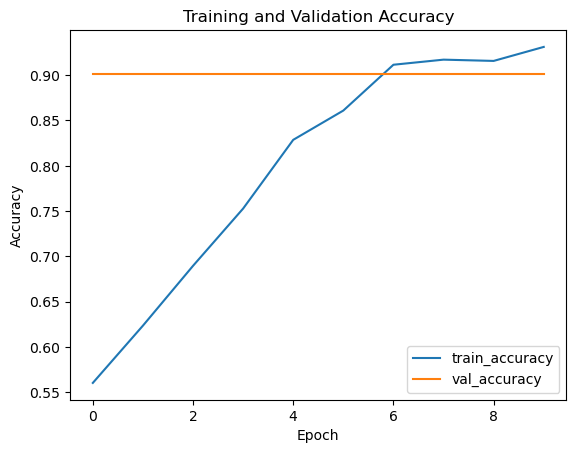

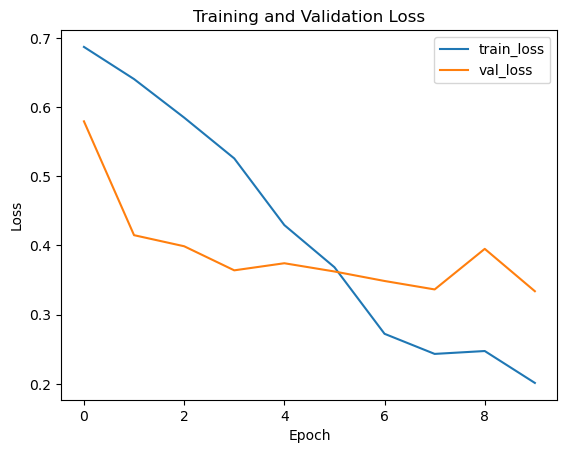

In [24]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

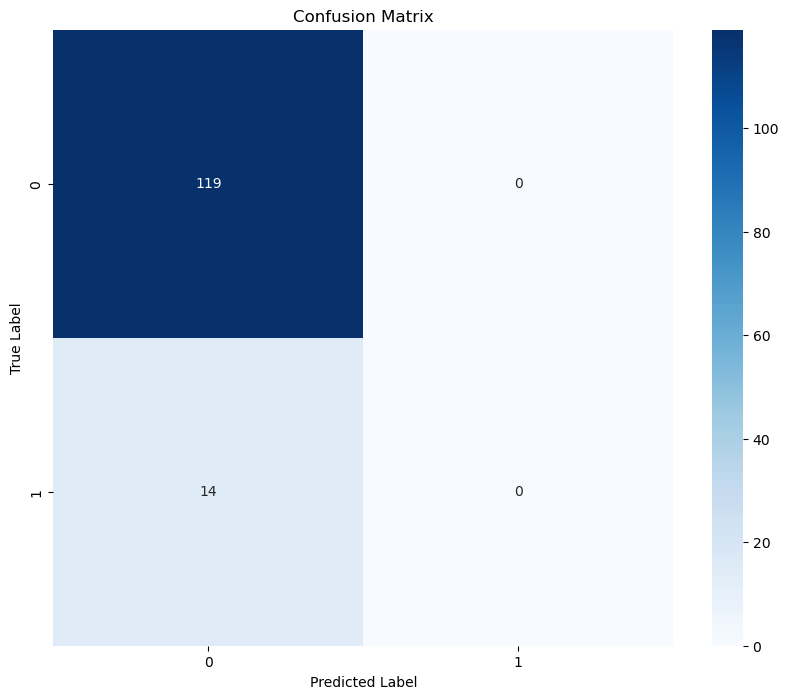

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, predicted_labels)


plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()